# Capstone 3: Forecasting Solar Power Using LTSM  
## _"Exploring ML Techniques for Solar Predictions"_
### **Modeling Objective**: Predict short-term solar power generation using time series forecasting models like LSTM and XGBoost, and evaluate their performance.
The **goal** of this project is to forcaset `DC_POWER`using time series forecasting techniques and machine learning models like LTSM and XGBoost. The model will help identify patterns in solar energy output based on histroical data, weather metrics, and engineered features. 

### **1. Load Preprocessed Data**
- Import necessary libraries.
- Load preprocessed datasets (`train_data.csv` and `test_data.csv`).
- Verify the structure and consistency of the loaded data.
- Finalize input features (`X`) and target variable (`y`) for training and testing.

---

### **2. Baseline Model**
- Implement a naive forecasting model using lagged values.
- Evaluate its performance using metrics like **RMSE**, **MAE**, or **MAPE**. What would be a good metric for this project?

---

### **3. LSTM Model**
#### **a. Prepare Data for LSTM**
- Convert the time series data into sequences (samples, timesteps, features).
- Ensure the input shape aligns with LSTM requirements.

#### **b. Build and Train the LSTM Model**
- Define the LSTM architecture with layers like `LSTM`, `Dropout`, and `Dense`.
- Compile and fit the model using training data.

#### **c. Evaluate LSTM**
- Make predictions using the test data.
- Measure performance using evaluation metrics.


### **4. XGBoost Model**
#### **a. Prepare Data for XGBoost**
- Flatten the time series data into a tabular format.
- Ensure compatibility with XGBoost by encoding categorical variables.

#### **b. Build and Train the XGBoost Model**
- Define hyperparameters (e.g., `n_estimators`, `learning_rate`, `max_depth`).
- Train the model using training data.

#### **c. Evaluate XGBoost**
- Make predictions using the test data.
- Measure performance using evaluation metrics.

### **5. Compare Model Performance**
- Compare baseline, LSTM, and XGBoost results using metrics like **RMSE**, **MAE**, and **MAPE**.
- Visualize actual vs. predicted values for each model.

---



In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

## 1. Load Data

In [9]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Solar/Data')

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')


In [170]:
train.head()

,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR,...,Normalized_Yield,Inverter_Efficiency,Plant_Efficiency,SOURCE_KEY_CODE,LOG_DC_POWER,LOG_AC_POWER,Lag_1_DC_POWER,Lag_4_DC_POWER,Lag_1_AC_POWER,Lag_4_AC_POWER
0,2020-05-15 00:00:00,1,0.254793,0.097269,0.0,0.0,0.0,0.0,7158964.0,0,...,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-05-15 00:00:00,1,0.254793,0.097269,0.0,0.0,0.0,0.0,7206408.0,0,...,0.0,0.0,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-05-15 00:00:00,1,0.254793,0.097269,0.0,0.0,0.0,0.0,7028673.0,0,...,0.0,0.0,0.0,19,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-05-15 00:00:00,1,0.254793,0.097269,0.0,0.0,0.0,0.0,6522172.0,0,...,0.0,0.0,0.0,22,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-15 00:00:00,1,0.254793,0.097269,0.0,0.0,0.0,0.0,7098099.0,0,...,0.0,0.0,0.0,23,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
test.head()

,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR,...,Normalized_Yield,Inverter_Efficiency,Plant_Efficiency,SOURCE_KEY_CODE,LOG_DC_POWER,LOG_AC_POWER,Lag_1_DC_POWER,Lag_4_DC_POWER,Lag_1_AC_POWER,Lag_4_AC_POWER
0,2020-06-05 01:45:00,2,0.143835,0.06747,0.0,0.0,0.0,6331.0,1.116675e+08,1,...,0.641244,0.0,1.0,13,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-06-05 01:45:00,2,0.143835,0.06747,0.0,0.0,0.0,6168.0,1.348478e+09,1,...,0.624734,0.0,1.0,14,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-06-05 01:45:00,2,0.143835,0.06747,0.0,0.0,0.0,6904.0,8.385746e+08,1,...,0.699281,0.0,1.0,15,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-06-05 01:45:00,2,0.143835,0.06747,0.0,0.0,0.0,5261.0,3.296018e+08,1,...,0.532867,0.0,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-06-05 01:45:00,2,0.143835,0.06747,0.0,0.0,0.0,0.0,1.412231e+09,1,...,0.000000,0.0,1.0,17,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
train.dtypes

DATE_TIME               object
PLANT_ID                 int64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
HOUR                     int64
DAY_OF_WEEK              int64
MONTH                    int64
Cumulative_Yield       float64
Normalized_Yield       float64
Inverter_Efficiency    float64
Plant_Efficiency       float64
SOURCE_KEY_CODE          int64
LOG_DC_POWER           float64
LOG_AC_POWER           float64
Lag_1_DC_POWER         float64
Lag_4_DC_POWER         float64
Lag_1_AC_POWER         float64
Lag_4_AC_POWER         float64
dtype: object

In [10]:
train['DATE_TIME'] = pd.to_datetime(train['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['DATE_TIME'] = pd.to_datetime(test['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [11]:
date_time_for_plotting = train['DATE_TIME']
test_date_time_for_plotting = test['DATE_TIME']
date_time_for_plotting = pd.to_datetime(date_time_for_plotting, errors='coerce')



In [12]:
train.drop(columns=['DATE_TIME'], inplace=True)
test.drop(columns=['DATE_TIME'], inplace=True)

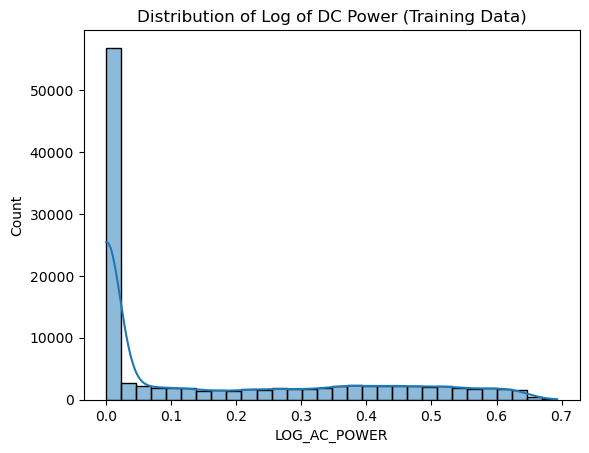

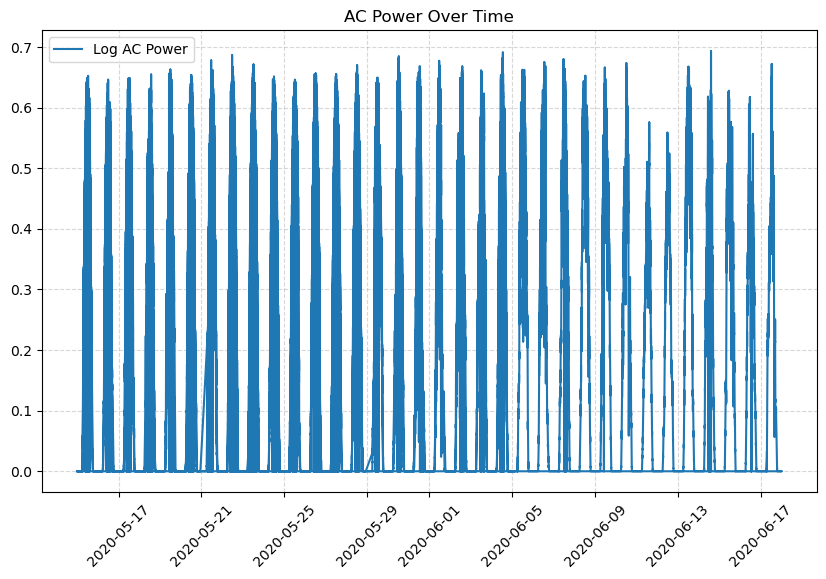

In [13]:
# Distribution of DC_POWER
sns.histplot(train['LOG_AC_POWER'], kde=True, bins=30)
plt.title('Distribution of Log of DC Power (Training Data)')
plt.show()



import matplotlib.dates as mdates

# Plot DC_POWER trends
plt.figure(figsize=(10, 6))
plt.plot(date_time_for_plotting, train['LOG_AC_POWER'], label='Log AC Power')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45) 
plt.title('AC Power Over Time')
plt.show()



In [66]:
corr_matrix = train[['DC_POWER', 'LOG_DC_POWER','Lag_1_DC_POWER', 'Lag_4_DC_POWER']].corr()
print(corr_matrix)

                DC_POWER  LOG_DC_POWER  Lag_1_DC_POWER  Lag_4_DC_POWER
DC_POWER        1.000000      0.997440        0.985588        0.981077
LOG_DC_POWER    0.997440      1.000000        0.984138        0.980258
Lag_1_DC_POWER  0.985588      0.984138        1.000000        0.983404
Lag_4_DC_POWER  0.981077      0.980258        0.983404        1.000000


In [14]:
#Target
rows_per_day = 96  # Assuming data is collected every 15 minutes

train['Target_AC_POWER'] = train['AC_POWER'].shift(-rows_per_day)
test['Target_AC_POWER'] = test['AC_POWER'].shift(-rows_per_day)


In [22]:
train.dropna(subset=['Target_AC_POWER'], inplace=True)
test.dropna(subset=['Target_AC_POWER'], inplace=True)

**Target Insight:**

`DC_POWER` represents the raw output-generated by the solar panels before any conversion losses. 

    By using shift (-day), we shit DC_POWER backwards by one day, making future power generation the target variable. 

In [24]:
#Data preparation
X_train = train.drop(columns=['Target_AC_POWER'])
y_train = train['Target_AC_POWER']

X_test = test.drop(columns=['Target_AC_POWER'])
y_test = test['Target_AC_POWER']

In [26]:
X_train.dtypes

PLANT_ID                 int64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
HOUR                     int64
DAY_OF_WEEK              int64
MONTH                    int64
Cumulative_Yield       float64
Normalized_Yield       float64
Inverter_Efficiency    float64
Plant_Efficiency       float64
SOURCE_KEY_CODE          int64
LOG_DC_POWER           float64
LOG_AC_POWER           float64
Lag_1_DC_POWER         float64
Lag_4_DC_POWER         float64
Lag_1_AC_POWER         float64
Lag_4_AC_POWER         float64
dtype: object

In [ ]:
###############################################

In [28]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.astype('float32')

# 2. Baseline Model

In [61]:
# Use Lag_1_AC_POWER for baseline predictions
baseline_predictions = test['AC_POWER']

# Calculate RMSE for the baseline
rmse_baseline = root_mean_squared_error(y_true=y_test, y_pred=baseline_predictions)
print(f"Baseline RMSE: {rmse_baseline}")


Baseline RMSE: 0.21876272535853863


# 3. XGBoost 

In [32]:
#  XGBoost Model

X_train_flat = train.drop(['AC_POWER'], axis=1).values
y_train_flat = train['AC_POWER'].values
X_test_flat = test.drop(['AC_POWER'], axis=1).values
y_test_flat = test['AC_POWER'].values

In [34]:
from sklearn.model_selection import TimeSeriesSplit
day = 96
tscv = TimeSeriesSplit(test_size=day, n_splits=29)

train_test_pairs = [(train, test)]  

cv_indices = []  
for train, test in train_test_pairs:
    train_indices = train.index
    test_indices = test.index
    cv_indices.append((train_indices, test_indices))

print(test.shape)
print(train.shape)

(27198, 23)
(109078, 23)


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor(random_state=1)
param_grid = {}
xgb_model = GridSearchCV(xgb, 
                  param_grid=param_grid, 
                  cv=cv_indices, 
                  verbose=10, 
                  scoring='neg_root_mean_squared_error')
xgb_model.fit(X_train_flat, y_train_flat)

xgb_predictions = xgb_model.predict(X_test_flat)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1; 1/1] START ............................................................
[CV 1/1; 1/1] END ............................., score=-0.001 total time=   0.2s


In [42]:
from sklearn.metrics import root_mean_squared_error
rmse_xgb = root_mean_squared_error(y_test_flat, xgb_predictions)
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 0.0009200512162714259


In [51]:

# Define the XGBRegressor with a fixed random state
xgb = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [5],
    'subsample': [0.8]
}
# GridSearchCV to tune hyperparameters
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,  
    cv=cv_indices,          # TimeSeriesSplit indices or folds
    verbose=10,
    scoring='neg_root_mean_squared_error'
)

# Fit the model
xgb_grid.fit(X_train_flat, y_train_flat)

# Make predictions on the test set
xgb_predictions = xgb_grid.predict(X_test_flat)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1; 1/1] START learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8
[CV 1/1; 1/1] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.001 total time=   0.1s


In [53]:
rmse_xgb = root_mean_squared_error(y_test_flat, xgb_predictions)
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 0.0010339961532443232


In [ ]:
# 3. ARIMA 

# 3. LSTM Model

In [288]:
# Define lookback period (e.g., 96 time steps for one day)
lookback = 96

# Function to create sequences for LSTM
def create_sequences(features, target, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(features)):
        X_seq.append(features[i-lookback:i])  # Sequence of past observations
        y_seq.append(target[i])  # Corresponding target
    return np.array(X_seq), np.array(y_seq)

# Create sequences for train and test
X_train_seq, y_train_seq = create_sequences(X_train.values, y_train.values, lookback)
X_test_seq, y_test_seq = create_sequences(X_test.values, y_test.values, lookback)

print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}, y_test_seq shape: {y_test_seq.shape}")

X_train_seq shape: (108886, 96, 23), y_train_seq shape: (108886,)
X_test_seq shape: (27006, 96, 23), y_test_seq shape: (27006,)


In [216]:
# Define  LSTM model
lstm_model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss

In [218]:
X_train_seq = X_train_seq.astype('float32')
X_test_seq = X_test_seq.astype('float32')

In [220]:
# Train the model
lstm_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

Epoch 1/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 152s 43ms/step - loss: 0.0614 - val_loss: 0.0217
Epoch 2/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 149s 44ms/step - loss: 0.0574 - val_loss: 0.0189
Epoch 3/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 158s 46ms/step - loss: 0.0576 - val_loss: 0.0187
Epoch 4/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 159s 47ms/step - loss: 0.0567 - val_loss: 0.0197
Epoch 5/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 193s 44ms/step - loss: 0.0579 - val_loss: 0.0216
Epoch 6/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 157s 46ms/step - loss: 0.0577 - val_loss: 0.0194
Epoch 7/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 149s 44ms/step - loss: 0.0573 - val_loss: 0.0212
Epoch 8/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 149s 44ms/step - loss: 0.0578 - val_loss: 0.0184
Epoch 9/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 151s 44ms/step - loss: 0.0577 - val_loss: 0.0188
Epoch 10/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 157s 46ms/step - loss: 0.0572 - val_loss: 0.0216
Epoch 11/20
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 153s 45ms/step - loss: 0.0575 - val_loss: 0.01

In [226]:
# Predict on test sequences
lstm_predictions = lstm_model.predict(X_test_seq)

rmse_lstm = mean_squared_error(y_test_seq, lstm_predictions, squared=False)
print(f"LSTM RMSE: {rmse_lstm}")

847/847 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
LSTM RMSE: 0.13748290644128255


C:\DataScience\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


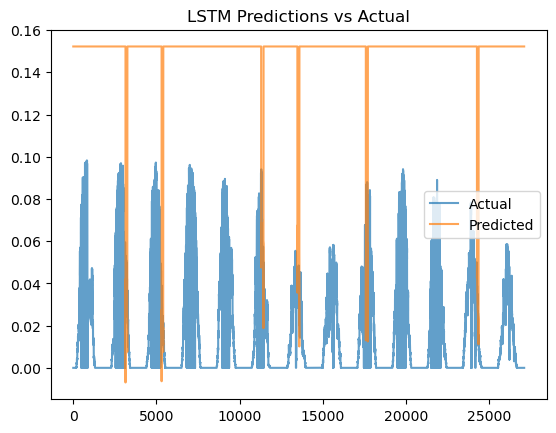

In [227]:

plt.plot(y_test_seq, label='Actual', alpha=0.7)
plt.plot(lstm_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()

Overfitting? ^^

# 5. Model Comparison

In [ ]:
results = {
    "Baseline RMSE": rmse_baseline,
    "LSTM RMSE": rmse_lstm,
    "XGBoost RMSE": rmse_xgb
}

print("Model Comparison:")
for model, score in results.items():
    print(f"{model}: {score}")

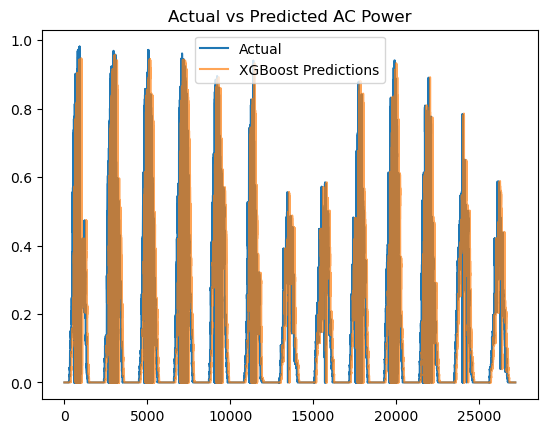

In [55]:
#Visualize results

plt.plot(y_test, label='Actual')
plt.plot(xgb_predictions, label='XGBoost Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted AC Power')
plt.show()

**Summary**:
- LSTM and XGBoost were evaluated for short-term solar power forecasting.
- 

**Next Steps**:
- Implement the model in real-time forecasting systems.
- Explore other deep learning architectures like GRU or hybrid models.